# TP1 - segmentation -
## M2 TSI – année 2024/2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Introduction :**
Cette série de travaux pratiques a pour but de mettre en pratique les connaissances acquises pendant le cours de segmentation d’images.
Les codes sources devront être écrits en python, et s’appuieront sur la bibliothèque de traitement d’images OpenCV.

**Objectif du TP :** Programmer des fonctions basiques et avancées de segmentation d’images par différentes approches de seuillage.

![grains.png](attachment:50f7284f-4d53-4526-b3df-0dc61c99c88f.png)

Figure1: *grains.png*

**Exercice 1 :**

Ecrire une fonction de lecture d’une image en niveau de gris et afficher l’histogramme de l’image de la Figure1.
Programmer l’expansion dynamique d’histogramme pour normaliser l’image source, c’est-à-dire ajuster l'échelle de ses niveaux de gris de façon à ce que l’image cible occupe tout l'intervalle des intensités disponibles ([0,255])
cible(x,y)=(source(x,y)−min)×255/(max−min)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


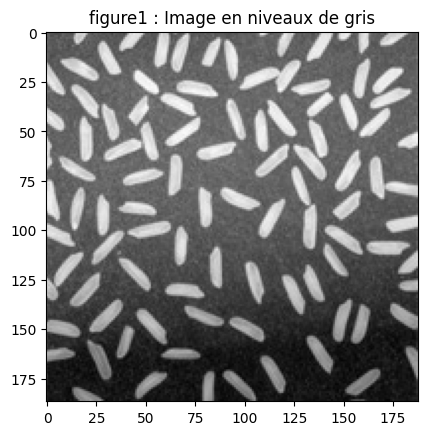

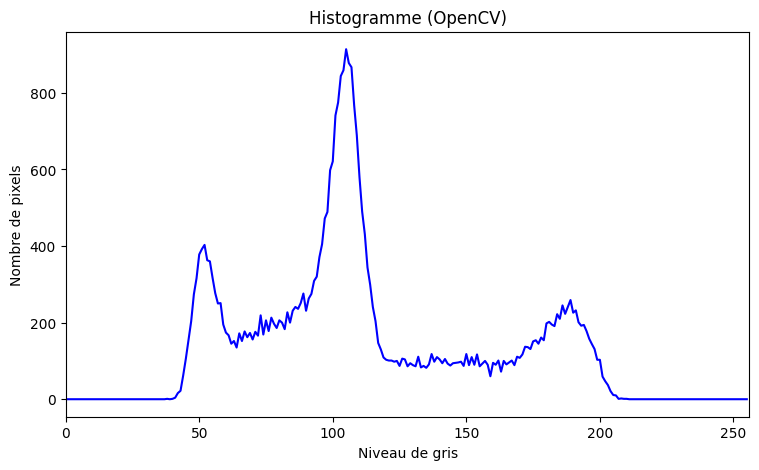

In [ ]:
#lire l'image en niveau de gris
def read(image):

    image = cv2.imread('/content/drive/MyDrive/images_TP1 (1)/grains.png', cv2.IMREAD_GRAYSCALE)

    plt.imshow(image, cmap='gray')
    plt.title("figure1 : Image en niveaux de gris")
    plt.show()


    return image

read ('image')

#Pour affichier l'histogramme

def histogramme(image):

    plt.figure(figsize=(30, 5))
    plt.subplot(1, 3, 1)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='blue')
    plt.title('Histogramme (OpenCV)')
    plt.xlabel('Niveau de gris')
    plt.ylabel('Nombre de pixels')
    plt.xlim([0, 256])

histogramme(cv2.imread('/content/drive/MyDrive/images_TP1 (1)/grains.png', cv2.IMREAD_GRAYSCALE) )

In [ ]:
#### Remarque : l'histogramme il permet la visualisation des intensités de l'image, ce qui est crucial dans la segmentation .

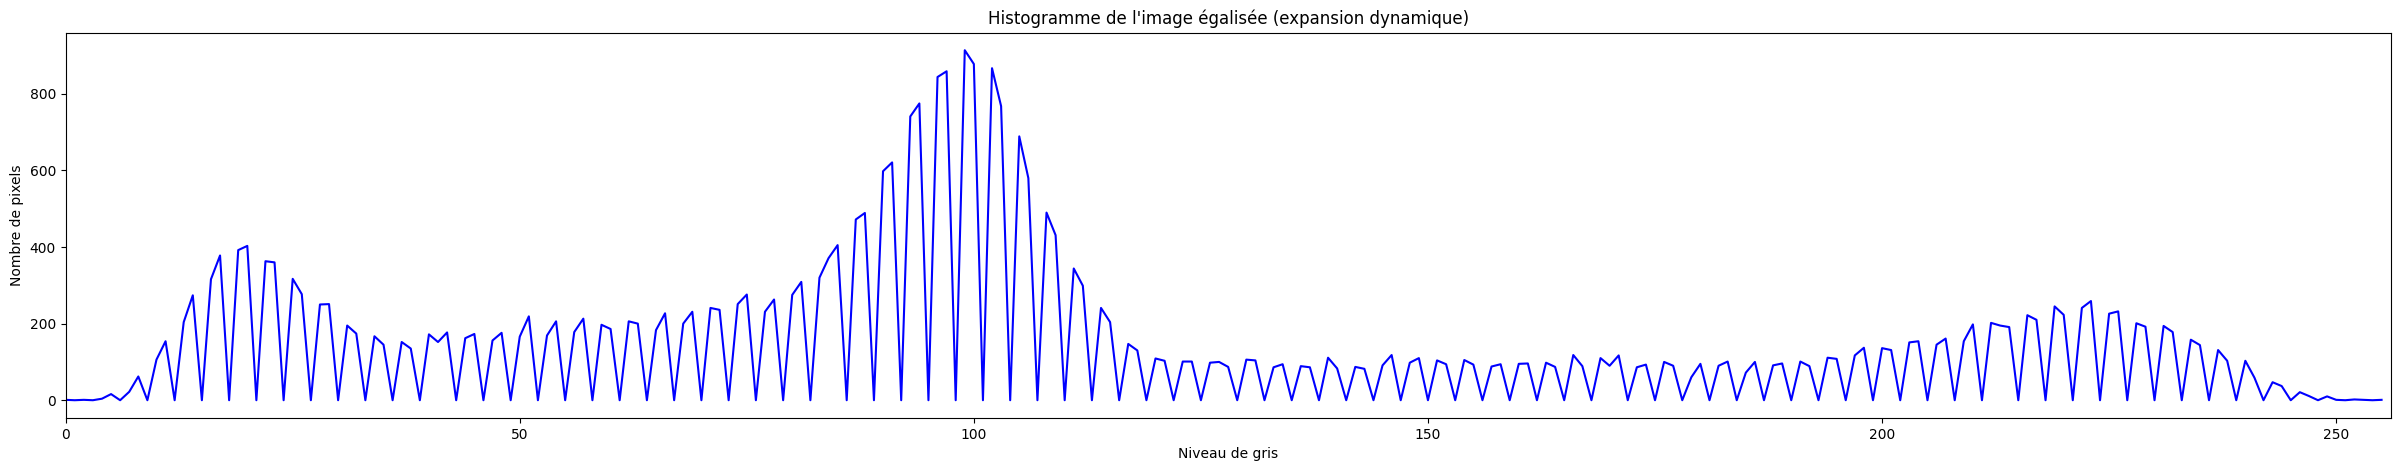

In [ ]:
def expansion_dynamique(image):

    min_val = np.min(image)
    max_val = np.max(image)
    image_normalisee = ((image - min_val) / (max_val - min_val)) * 255

    return image_normalisee


image_normalisee = expansion_dynamique(cv2.imread('/content/drive/MyDrive/images_TP1 (1)/grains.png', cv2.IMREAD_GRAYSCALE))

# Afficher l'histogramme de l'image normalisée (égalisation dynamique)
plt.figure(figsize=(30, 5))
hist_normalisee = cv2.calcHist([image_normalisee.astype(np.uint8)], [0], None, [256], [0, 256])
plt.plot(hist_normalisee, color='blue')
plt.title('Histogramme de l\'image égalisée (expansion dynamique)')
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.xlim([0, 256])
plt.show()


In [ ]:
##Remarque : expansion_dynamique permet de normaliser l'image source, de maniere a etendre les niveaux de grix sur toute l'echelle disponible [0 255]
###"Permet d'ameliorer la visibilité des détails dans l'image a faible contraste"

**Exercice 2 :** (seuillage global) :

Ecrire un programme qui lit une image en niveau de gris puis affiche le résultat du seuillage de l’image pour les différents types d’opération « basiques » de seuillage disponibles dans openCV (Threshold Binary, Threshold Binary Inverted, Truncate, Threshold to Zero, Threshold to Zero Inverted).
Programmer une fonction Range qui applique un double seuillage sur l’image (bas et haut).

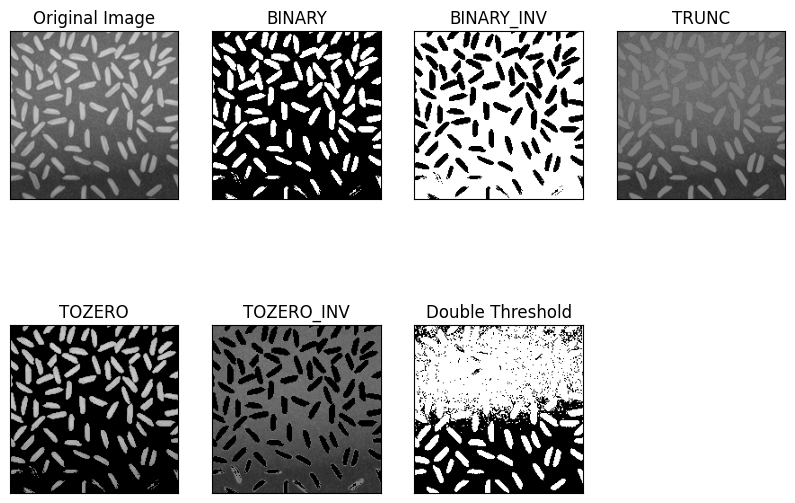

In [ ]:

# Charger l'image en niveaux de gris
img = cv2.imread('/content/drive/MyDrive/images_TP1 (1)/grains.png', cv2.IMREAD_GRAYSCALE)

# Application des opérations de seuillage basiques d'OpenCV
_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)


def Range(image, low, high):
    # Seuillage binaire avec le seuil bas
    _, thresh_low = cv2.threshold(image, low, 255, cv2.THRESH_BINARY)
    # Seuillage binaire inverse avec le seuil haut
    _, thresh_high = cv2.threshold(image, high, 255, cv2.THRESH_BINARY_INV)
    # Combinaison des deux pour obtenir le double seuillage
    double_thresh = cv2.bitwise_and(thresh_low, thresh_high)
    return double_thresh

# Application du double seuillage avec des valeurs bas et haut
double_threshold = Range(img, 100, 200)

# Affichage des résultats
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV', 'Double Threshold']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5, double_threshold]

plt.figure(figsize=(10, 7))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


In [ ]:
##"Remarque : "
## THRESH_TOZERO :  peut etre utile pour mettre en evidance les zones claire de l'image
## THRESH_TRUNC  :  utile pour d'ecreter les pixels au dessu d'un certin seuil
## On utilise la fonction range  pour appliquer le Double seuillage, qui permet de segmenter l'image en deux plages d'intesité

**Exercice 3 :** (Seuillage local adaptatif) :

Programmer une fonction de seuillage adaptatif de l’image qui s’appuie sur le calcul de la moyenne locale (l’ordre du voisinage étant contrôlé par une variable).
Comparer vos résultats avec ceux obtenus par les fonctions d’openCV ADAPTIVE_THRESH_MEAN_C et ADAPTIVE_THRESH_GAUSSIAN_C.


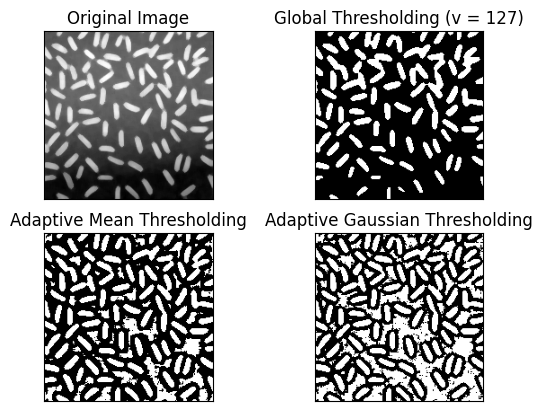

In [ ]:

img = cv2.imread('/content/drive/MyDrive/images_TP1 (1)/grains.png', cv2.IMREAD_GRAYSCALE)

img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
## cv2.medianBlur : le filtre median est appliqué a l'image pour reduire le bruit tout en preservant les conteurs,
## utile avent le seuillage pour eviter le bruit

In [ ]:
#Remarque :
## le seuillage adaptative est efficace pour les images avec des variations de luminosité,
## il permet de mieux séparer les grains de l'ariere plans dans toutes les parties de l'image par rapport au seuillage global
# Comparaison :le seuillage adaptative gaussien donne un résultat moins bruité et légerement plus doux que le seuillage adptative moyen,
### donc pour une détection plus propre de conteur il est préférable d'utiliser le seuillage adaptatif gaussien

**Exercice 4 :** (Seuillage par l’algorithme d’Otsu)

Considérons une image bimodale (une image dont l'histogramme possède « deux pics », ou plus exactement deux modes). Pour cette image, nous devons rechercher une valeur située entre ces deux pics et considérer cette valeur comme seuil.
La méthode d’Otsu a été inventée par Nobuyuki Otsu en 1979 [1] . Son principe de fonctionnement est le suivant : nous posons l’hypothèse que dans l’image à segmenter il existe deux classes de pixels. La première correspond aux pixels du fond, la seconde correspond aux pixels des objets à segmenter (ou inversement). En admettant que ces deux classes sont séparables par leur niveau de gris, nous pouvons définir que les pixels ayant une intensité comprise entre 0 et k appartiennent à la première classe et que les autres dont l’intensité comprise entre k+1 et 255 appartiennent à la seconde classe. Nous allons donc chercher à fixer un seuil k tels que la séparation de ces deux classes soit optimale, cad le seuil qui minimise la variance intra-classe à partir de tous les seuillages possibles

Programmer une fonction seuillage_OTSU() et comparer vos résultats avec la fonction threshold() fournie par openCV en passant un drapeau supplémentaire, cv.THRESH_OTSU.

* [1] A Threshold Selection Method from Gray-Level Histograms NOBUYUKI OTSU, 1979.
* [Otsu method and source code](https://en.wikipedia.org/wiki/Otsu%27s_method)
* [python implementation d’Otsu:](https://github.com/mohabmes/Otsu-Thresholding/)

In [ ]:
####    vise a determiner le seuil optimal pour separer les pixel d'une image en deux classe (l'objet et le fond)
## ---> efficace pour les images bimodales c-a-d ou l'histogramme represente deux pics (l'objet et le fond)
###     un seuil optimal c'est celui qui rend chaque classe homogene que possible
###     l'algorithme :
###     1-Seuillage global avec un seuil 127
##      2-Seuillage d'Otsu c'ets une méthode automatique de sélection du seuil
##      3-une étape de lissage (filtrage Gaussien) est réalisée sur l'image (cv2.GaussianBlur())

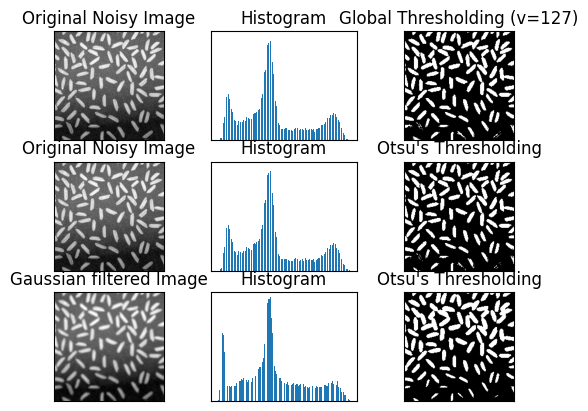

In [ ]:
img = cv2.imread('/content/drive/MyDrive/images_TP1 (1)/grains.png', cv2.IMREAD_GRAYSCALE)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
## Remarque : le filtre gaussien avant le seuillage d'Otsu reduit le bruit,  ameliore les résultat
## et rend la séparation des classes (objet et fond ) plus claire .
# le filtre d'Ostu avec un filtrage gaussien efficace pour les images complexes,

## Comparaison : Le seuillage global est plus adapté à des cas simples, mais pour des images complexes,
## les méthodes d'Otsu offriront de meilleurs résultats.


**Exercice 5 :** (Détection de contours et seuillage par hystéresis)

Après avoir calculé le module du gradient d’une image en niveau de gris (par l’application des filtres de Sobel, ou Canny implémentés dans openCV), un seuillage par hystérésis est souvent utilisé pour détecter les contours pertinents dans l’image.

L'idée est d'obtenir un compromis entre contours trop sélectifs et contours pas assez sélectifs, compromis qui ne serait pas atteignable avec un seuil unique.
Le principe de l'hystéresis est classiquement utilisé et conjugué à une détection de contours. En se basant, par exemple, sur un calcul du gradient d'une image, on peut détecter des contours en appliquant un seuillage simple, i.e en se fixant un seuil S et en ne conservant de l'image que les pixels dont le module du gradient est supérieur à S. On obtient ainsi une image binaire qui ne fait apparaître que les contours détectés. Le problème réside donc dans le choix du seuil : un seuil trop bas conduit à des sur détections (trop de bruit), un seuil trop haut conduit à des contours non fermés. Le but de la méthode qui suit est de diminuer l'importance du seuil. Le seuillage par hystéresis introduit deux seuils : un seuil haut et un seuil bas.
Si la norme du gradient est supérieure au seuil haut, c'est un point de contour conservé, qu'on code par 1. Si la norme du gradient est inférieure au seuil bas, alors ce n'est pas un point de contour rejeté, qu'on code par 0. Si la norme du gradient est entre les deux, alors c'est un contour de fermeture (ou jonction), i.e un contour potentiel et qu'on code par 2. Ces contours sont conservés s'ils sont adjacents à un contour codé 1.

Programmer une fonction Seuillage_Hystérésis() et appliquer cette fonction sur une image en niveau de gris qui décrit des contours extraits par une filtrage de type gradient.


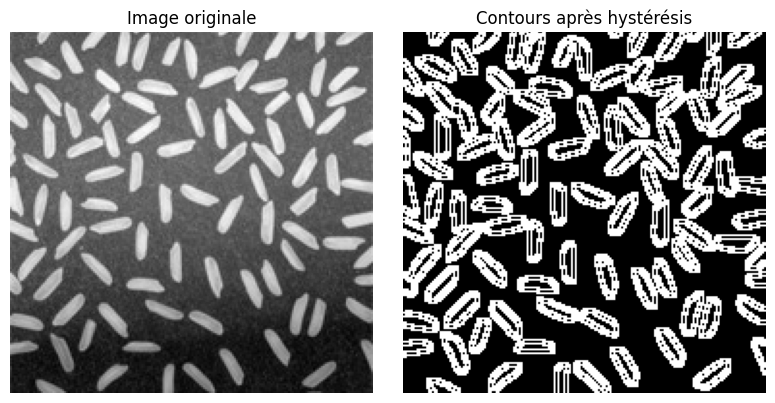

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Seuillage_Hystereses(image, seuil_bas, seuil_haut):

    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    grad_mag = cv2.magnitude(grad_x, grad_y)

    result = np.zeros_like(grad_mag, dtype=np.uint8)

    result[grad_mag > seuil_haut] = 255

    contour_potential = (grad_mag > seuil_bas) & (grad_mag <= seuil_haut)

    for i in range(1, grad_mag.shape[0] - 1):
        for j in range(1, grad_mag.shape[1] - 1):
            if contour_potential[i, j]:
                if np.any(result[i-1:i+2, j-1:j+2] == 255):
                    result[i, j] = 255
    return result

image = cv2.imread('/content/drive/MyDrive/images_TP1 (1)/grains.png', cv2.IMREAD_GRAYSCALE)

contours_image = cv2.Canny(image, 100, 200)

seuil_bas = 50
seuil_haut = 150
hystereses_result = Seuillage_Hystereses(contours_image, seuil_bas, seuil_haut)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Image originale")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Contours après hystérésis")
plt.imshow(hystereses_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
## la norme de gradient permet de détecter les variations d'intensité lumineuse, essentielles pour identifier les contours
## La fonction cv2.Sobel calcule la dérivée de l'image selon les axes x et y
## Propagation des contours : les contours faibles connectés à des contours forts sont conservés, les autres sont rejeté
## On remarque que les contours des grains sont bien détectés, sont entourés par des lignes blanches représentant les contours forts
## permis de supprimer la plupart des faux contours